Write code to generate synthetic AB test data. Converted visits, conversions, revenue…

Write lib to compute test statistic from this data. Check how others do and compare results.

This will be the basis for future work.
N: # de visiteurs qui sont ciblés par le test
: nombre de variation (=2)
: répartition entre les variations (50%-50%)
: taux de conversion de base du goal (10%)
: MDE - effet minimal que l’on veut détecter (5% relatif)
#2 variant case : number of the variant in function of MDE estimate the minimal number of variant users
alpha: risque de type I
beta: risque de type II

H0: pas de différences entre l’originale et la variation

In [3]:
pip install statsmodels


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import ipywidgets as widgets
from IPython.display import display
def interactive_plot(mu_MDE=2.0, sigma=1.0, alpha=0.05, power=0.8):
    x_min = -10
    x_max = max(-x_min, mu_MDE + 5 * sigma)  
    x = np.linspace(x_min, x_max, 1000)
    mu_H0 = 0  # Mean of the null hypothesis distribution
    # Create distributions
    H0_distribution = norm.pdf(x, mu_H0, sigma)
    MDE_distribution = norm.pdf(x, mu_MDE, sigma)
    plt.figure(figsize=(13, 6))
    plt.plot(x, H0_distribution, color='blue', label='H0 Sample Distribution (Assumes no effect)')
    #plt.fill_between(x, H0_distribution, color='teal', alpha=0.3)
    plt.plot(x, MDE_distribution, color='green', label='Alternative Hypothesis Distribution')
 
    plt.axvline(mu_H0, color='blue', linestyle='dashed', linewidth=1)
    plt.axvline(mu_MDE, color='green', linestyle='dashed', linewidth=1)
    # Calculating the critical z-values for alpha and the inverse of power (beta)
    z_alpha = norm.ppf(1 - alpha, mu_H0, sigma)
    beta = 1 - power
    z_beta = norm.ppf(beta, mu_MDE, sigma)
    plt.fill_betweenx(H0_distribution, x, z_alpha, where=(x > z_alpha), color='blue', alpha=0.5, label='Type I Error (α)')
    plt.fill_betweenx(MDE_distribution, x, z_beta, where=(x < z_beta), color='green', alpha=0.5, label='Type II Error β')
    
    plt.title('Properly Powering Your (One-sided) AB Test')
    plt.ylim(0,1)
    plt.legend()
    plt.grid(True)
    plt.show()
# Create interactive widgets
widgets.interact(interactive_plot, MDE=(0.0, 1.0, 0.01), sigma=(0.5, 2.0, 0.1), alpha=(0.01, 0.2, 0.01), power=(0.5, 0.99, 0.01))

interactive(children=(FloatSlider(value=2.0, description='mu_MDE', max=6.0, min=-2.0), FloatSlider(value=1.0, …

<function __main__.interactive_plot(mu_MDE=2.0, sigma=1.0, alpha=0.05, power=0.8)>

In [5]:
import numpy as np
import pandas as pd
from scipy import stats  
from scipy.stats import norm
from math import *
class ABTEST :

    def __init__(self, nv=2,mde=0.05,alpha=0.05,beta=0.2,ctr1=0.1,r=0.5):
        self.nbre_va = nv
        self.mde=mde
        self.alpha=alpha 
        self.baseline=ctr1
        self.beta=beta 
        self.ratio=r

    def estimateSZ (self,p=0.5) :
        #we assume the two population have the same variance which is plausible under H0=sigma=self.baseline(1-self.baseline)
        sigma_2=self.baseline*(1-self.baseline)
        m=1/(self.ratio*(1-self.ratio))*sigma_2*(norm.ppf(1-self.alpha/2, loc=0, scale=1)+norm.ppf(1-self.beta, loc=0, scale=1))**2/(self.baseline*self.mde)**2
        ###add the ratio data split 
    
        return (floor(m))
    
            
    #Power analysis method 
    #look at sensitivity to beta and delta given some input data (simulated )








This part aim to show that the equal data split between the original and the variant B is the one that minimizes the variance of the estimateur.

/var/folders/8l/4tl6l51x1f3cqh1l089ng_380000gn/T/ipykernel_26042/2349359371.py:5: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(p*(1-p)*(1/(ntot*(alpha))+1/(ntot*(1-alpha))))


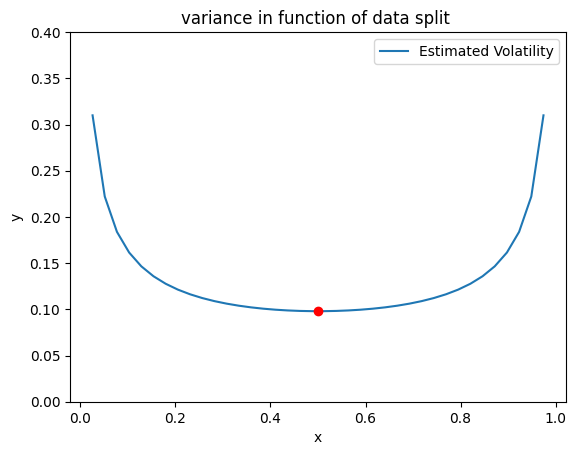

In [6]:
p=0.4
ntot=100
#eps=0.0000000001
def vsmile(p,ntot,alpha):
    return np.sqrt(p*(1-p)*(1/(ntot*(alpha))+1/(ntot*(1-alpha))))
X=np.linspace(0,1,40)
Y=[]
for x in X :
    Y.append(vsmile(p,ntot,x))
#plt.plot(X,Y)
fig, ax = plt.subplots()

ax.plot(X, Y, label='Estimated Volatility')
x_point =0.5
y_point = vsmile(p,ntot,x_point)
ax.plot(x_point, y_point, 'ro')  
ax.set_title('variance in function of data split ')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.ylim(0,0.4)
ax.legend()
# Afficher la figure
plt.show()

Seeing the behaviour of 1-beta in function  OF MDE (CURVE 1)
seeing the behaviour of power in function of N (for different alpha ) (curve 2)


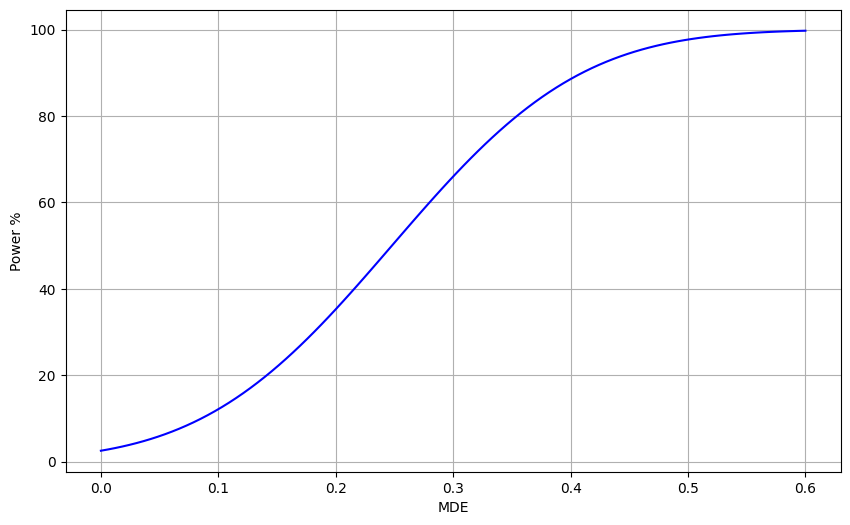

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define the range of x values
x = np.linspace(0, 0.6, 100)
ratio=0.5
baseline=0.5
n=1000 #total sample size
alpha=0.05
# Compute the CDF values for the standard normal distribution (mean=0, std=1)
def quant(n,ratio,baseline,mde,alpha):
    m=sqrt(n*ratio*(1-ratio))*baseline*mde-norm.ppf(1-alpha/2, loc=0, scale=1)
    return m 
cdf_values=[]
for d in x : 
    cdf_values.append(norm.cdf(quant(n,ratio,baseline,d,alpha), loc=0, scale=1)*100)

# Plot the CDF
plt.figure(figsize=(10, 6))
plt.plot(x, cdf_values, color='blue')
#plt.title('Cumulative Distribution Function (CDF) of a Standard Normal Distribution')
plt.xlabel('MDE')
plt.ylabel('Power %')
#plt.legend()
plt.grid(True)
plt.show()


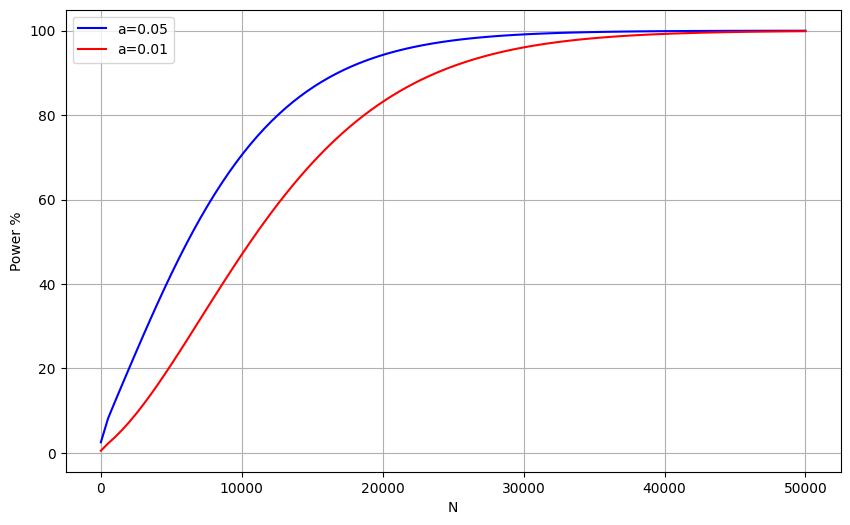

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define the range of x values
x = np.linspace(0, 50000 ,100)
ratio=0.5
p=baseline=0.5
alpha=0.05
mde=0.1
# Compute the CDF values for the standard normal distribution (mean=0, std=1)
def quant(n,ratio,baseline,mde,alpha):
    m=sqrt(n*ratio*(1-ratio))*baseline*mde-norm.ppf(1-alpha/2, loc=0, scale=1)
    return m 
cdf_values=cdf_values1=[]
cdf_values1=[]
for d in x : 

    cdf_values.append(norm.cdf(quant(d,ratio,baseline,mde,alpha), loc=0, scale=1)*100)
    cdf_values1.append(norm.cdf(quant(d,ratio,baseline,mde,0.01), loc=0, scale=1)*100)

# Plot the CDF
plt.figure(figsize=(10, 6))
plt.plot(x, cdf_values, label='a=0.05',color='blue')
plt.plot(x, cdf_values1, label='a=0.01',color='red')

#plt.title('Cumulative Distribution Function (CDF) of a Standard Normal Distribution')
plt.xlabel('N')
plt.ylabel('Power %')
plt.legend()
plt.grid(True)
plt.show()

NO FREE LUNCH, decreasing type 1 ERROR (reject wrongly H0) DECREASES statistical power(detect a true significant effect)

In [9]:
#Unequal allocation between traffic 

In [10]:
def estimateSZ (p,mde,r,alpha,beta) :
        #we assume the two population have the same variance which is plausible under H0=sigma=self.baseline(1-self.baseline)
        sigma_2=p*(1-p)
        m=1/(r*(1-r))*sigma_2*(norm.ppf(1-alpha/2, loc=0, scale=1)+norm.ppf(1-beta, loc=0, scale=1))**2/(p*mde)**2
        ###add the ratio data split 
    
        return (floor(m))

In [28]:
import numpy as np
import scipy.stats as stats
import statsmodels.stats.power as smp
from pingouin import power_ttest2n
from statsmodels.stats.weightstats import ztest as ztest

def generate_data(n1, p1, n2, mde):
    """
    Génère deux échantillons de données avec des tailles et des variances spécifiées.
    
    Arguments:
    n1 -- Taille de l'échantillon 1
    var1 -- Variance de l'échantillon 1
    n2 -- Taille de l'échantillon 2
    var2 -- Variance de l'échantillon 2
    
    Retourne:
    data1 --
    data2 --
    """
    data1 = np.random.binomial(1, p1, int(n1))
    data2 = np.random.binomial(1, p1*(1+mde),int(n2) )
    
    return data1, data2

def perform_z_test(data1, data2):
    """
    
    Arguments:
    data1 -- base sample
    data2 -- variant sample
    
    Retourne:
    t_stat -- t-test
    p_value
    """
    z_stat, p_value = ztest (data1, data2, value=0) 
    return z_stat, p_value


# Parameters

    
#n = 1000
p1 =0.4  
mde=0.1
p2=0.4*(1+mde)
r=0.5
beta=0.2
n=estimateSZ (p1,mde,r,alpha,beta)
print(n)
# simulation
data1, data2 = generate_data(r*n, p1, (1-r)*n,mde )

# T-test
t_stat, p_value = perform_z_test(data1, data2)
alpha = 0.05
num_simulations=1000



    

4709


In [27]:

def compute_test_power(alpha=0.05,num_simulations=10000):
    powers = 0
    for _ in range(num_simulations):
        control_data,treatment_data= generate_data(r*n, p1, (1-r)*n,mde )
        control_mean = np.mean(control_data)
        treatment_mean = np.mean(treatment_data)
        control_var = np.std (control_data)**2
        treatment_var = np.std(treatment_data)**2
        z_stat, p_value = perform_z_test(control_data,treatment_data)
        if abs(z_stat) > norm.ppf(1 - alpha / 2):
            powers += 1
    power_rate = powers / num_simulations
    return power_rate
power_rate = compute_test_power(alpha,num_simulations=10000)
print(f"Power Rate: {power_rate:.4f}")

Power Rate: 0.7903


Simulating user data with intracorrelation.

In [13]:
import numpy as np
from scipy.stats import norm, truncnorm, poisson, bernoulli, ttest_ind
# Set parameters
px = 0.6
delta = 0.05
sigma = 0.175
K = 5000
lambda_sessions = 3
alpha = 0.05
power = 0.80
num_simulations = 1000
k_per_arm = 448
def truncated_normal(mean, sd, lower, upper):
    a, b = (lower - mean) / sd, (upper - mean) / sd
    return truncnorm(a, b, loc=mean, scale=sd)
def simulate_user_data(mu, num_users):
    session_counts = poisson.rvs(mu=lambda_sessions, size=num_users)
    #ession_counts = np.array(1*num_users)
    pis = truncated_normal(mu, sigma, mu - 2 * sigma, mu + 2 * sigma).rvs(size=num_users)
    conversions = [bernoulli.rvs(pi, size=n).sum() for pi, n in zip(pis, session_counts)]
    return conversions, session_counts
def delta_method_var(mu, sigma, N):
    return sigma**2 / N
def run_simulation():
    type_I_errors = 0
    powers = 0
    for _ in range(num_simulations):
        # Null hypothesis simulation
        control_conversions, control_sessions = simulate_user_data(px, k_per_arm)
        treatment_conversions, treatment_sessions = simulate_user_data(px, k_per_arm)
        control_mean = np.mean(control_conversions)
        treatment_mean = np.mean(treatment_conversions)
        control_var = delta_method_var(px, sigma, np.mean(control_sessions))
        treatment_var = delta_method_var(px, sigma, np.mean(treatment_sessions))
        t_stat = (treatment_mean - control_mean) / np.sqrt(treatment_var + control_var)
        if abs(t_stat) > norm.ppf(1 - alpha / 2):
            type_I_errors += 1
        # Alternative hypothesis simulation
        control_conversions, control_sessions = simulate_user_data(px, k_per_arm)
        treatment_conversions, treatment_sessions = simulate_user_data(px + delta, k_per_arm)
        control_mean = np.mean(control_conversions)
        treatment_mean = np.mean(treatment_conversions)
        control_var = delta_method_var(px, sigma, np.mean(control_sessions))
        treatment_var = delta_method_var(px + delta, sigma, np.mean(treatment_sessions))
        t_stat = (treatment_mean - control_mean) / np.sqrt(treatment_var + control_var)
        if abs(t_stat) > norm.ppf(1 - alpha / 2):
            powers += 1
    type_I_error_rate = type_I_errors / num_simulations
    power_rate = powers / num_simulations
    return type_I_error_rate, power_rate
type_I_error_rate, power_rate = run_simulation()
print(f"Type I Error Rate: {type_I_error_rate:.4f}")
print(f"Power Rate: {power_rate:.4f}")

Type I Error Rate: 0.0030
Power Rate: 0.0810


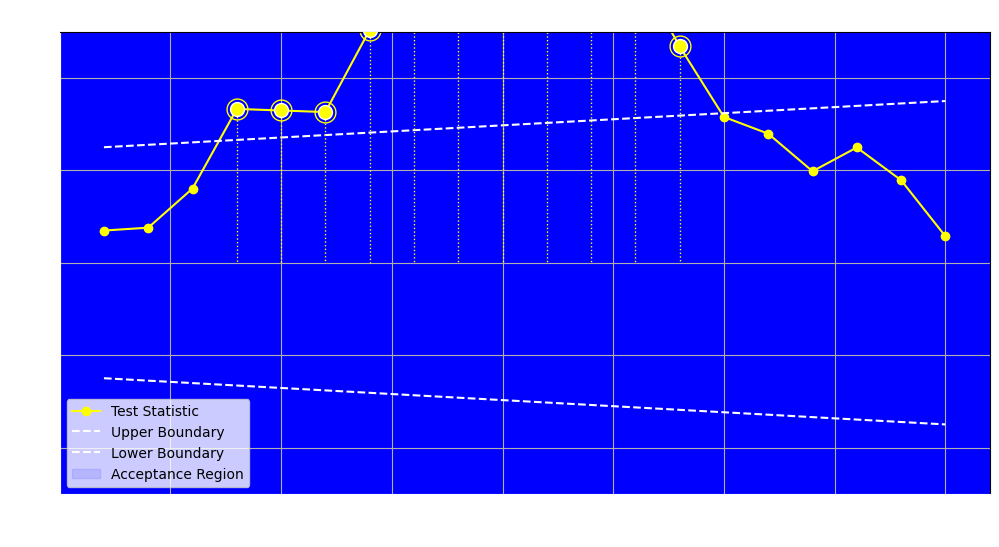

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate test statistic data
np.random.seed(42)
time = np.arange(1, 21)
test_statistic = np.cumsum(np.random.normal(loc=0.2, scale=1, size=time.shape))

# Define stopping boundaries (example values)
upper_boundary = np.linspace(2.5, 3.5, time.size)
lower_boundary = -upper_boundary

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(time, test_statistic, marker='o', color='yellow', label='Test Statistic')
plt.plot(time, upper_boundary, '--', color='white', label='Upper Boundary')
plt.plot(time, lower_boundary, '--', color='white', label='Lower Boundary')
plt.fill_between(time, lower_boundary, upper_boundary, color='blue', alpha=0.1, label='Acceptance Region')

# Highlight significant result
significant_time = time[test_statistic > upper_boundary]
significant_statistic = test_statistic[test_statistic > upper_boundary]
if significant_time.size > 0:
    plt.scatter(significant_time, significant_statistic, color='yellow', s=100, edgecolor='white', zorder=5)
    for t, s in zip(significant_time, significant_statistic):
        plt.plot([t, t], [s, 0], 'yellow', linewidth=1, linestyle=':')
        plt.plot(t, s, 'yellow', marker='o', markersize=15, fillstyle='none')

# Formatting
plt.title('Group Sequential Testing')
plt.xlabel('Time')
plt.ylabel('Test Statistic')
plt.legend()
plt.grid(True)
plt.ylim(-5, 5)
plt.xlim(0, time.size + 1)
plt.gca().set_facecolor('blue')
plt.gca().spines['bottom'].set_color('white')
plt.gca().spines['left'].set_color('white')
plt.gca().tick_params(axis='x', colors='white')
plt.gca().tick_params(axis='y', colors='white')
plt.gca().title.set_color('white')
plt.gca().yaxis.label.set_color('white')
plt.gca().xaxis.label.set_color('white')

plt.show()
